<h1 align="center"> Python Essentials: Data Visualization.</h1>

    <Name> Sukyoung Kwak
    <Class> Math 345 - 2
    <Date> December 3rd 

In [1]:
!sudo pip install scipy


We trust you have received the usual lecture from the local System
Administrator. It usually boils down to these three things:

    #1) Respect the privacy of others.
    #2) Think before you type.
    #3) With great power comes great responsibility.

[sudo] password for sk437@byu.local: 


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.special import comb

In [3]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

The order: mean in x,y, variance in x,y, slope, intercept, coefficient

Statistics for the 0 th column:
9.0 7.500909090909093 10.0 3.7520628099173554 0.5000909090909091 3.0000909090909103 0.8164205163448399
The order: mean in x,y, variance in x,y, slope, intercept, coefficient

Statistics for the 1 th column:
9.0 7.50090909090909 10.0 3.752390082644628 0.5000000000000001 3.000909090909089 0.816236506000243
The order: mean in x,y, variance in x,y, slope, intercept, coefficient

Statistics for the 2 th column:
9.0 7.5 10.0 3.747836363636364 0.4997272727272729 3.002454545454544 0.8162867394895984
The order: mean in x,y, variance in x,y, slope, intercept, coefficient

Statistics for the 3 th column:
9.0 7.500909090909091 10.0 3.7484082644628103 0.4999090909090909 3.0017272727272726 0.8165214368885028


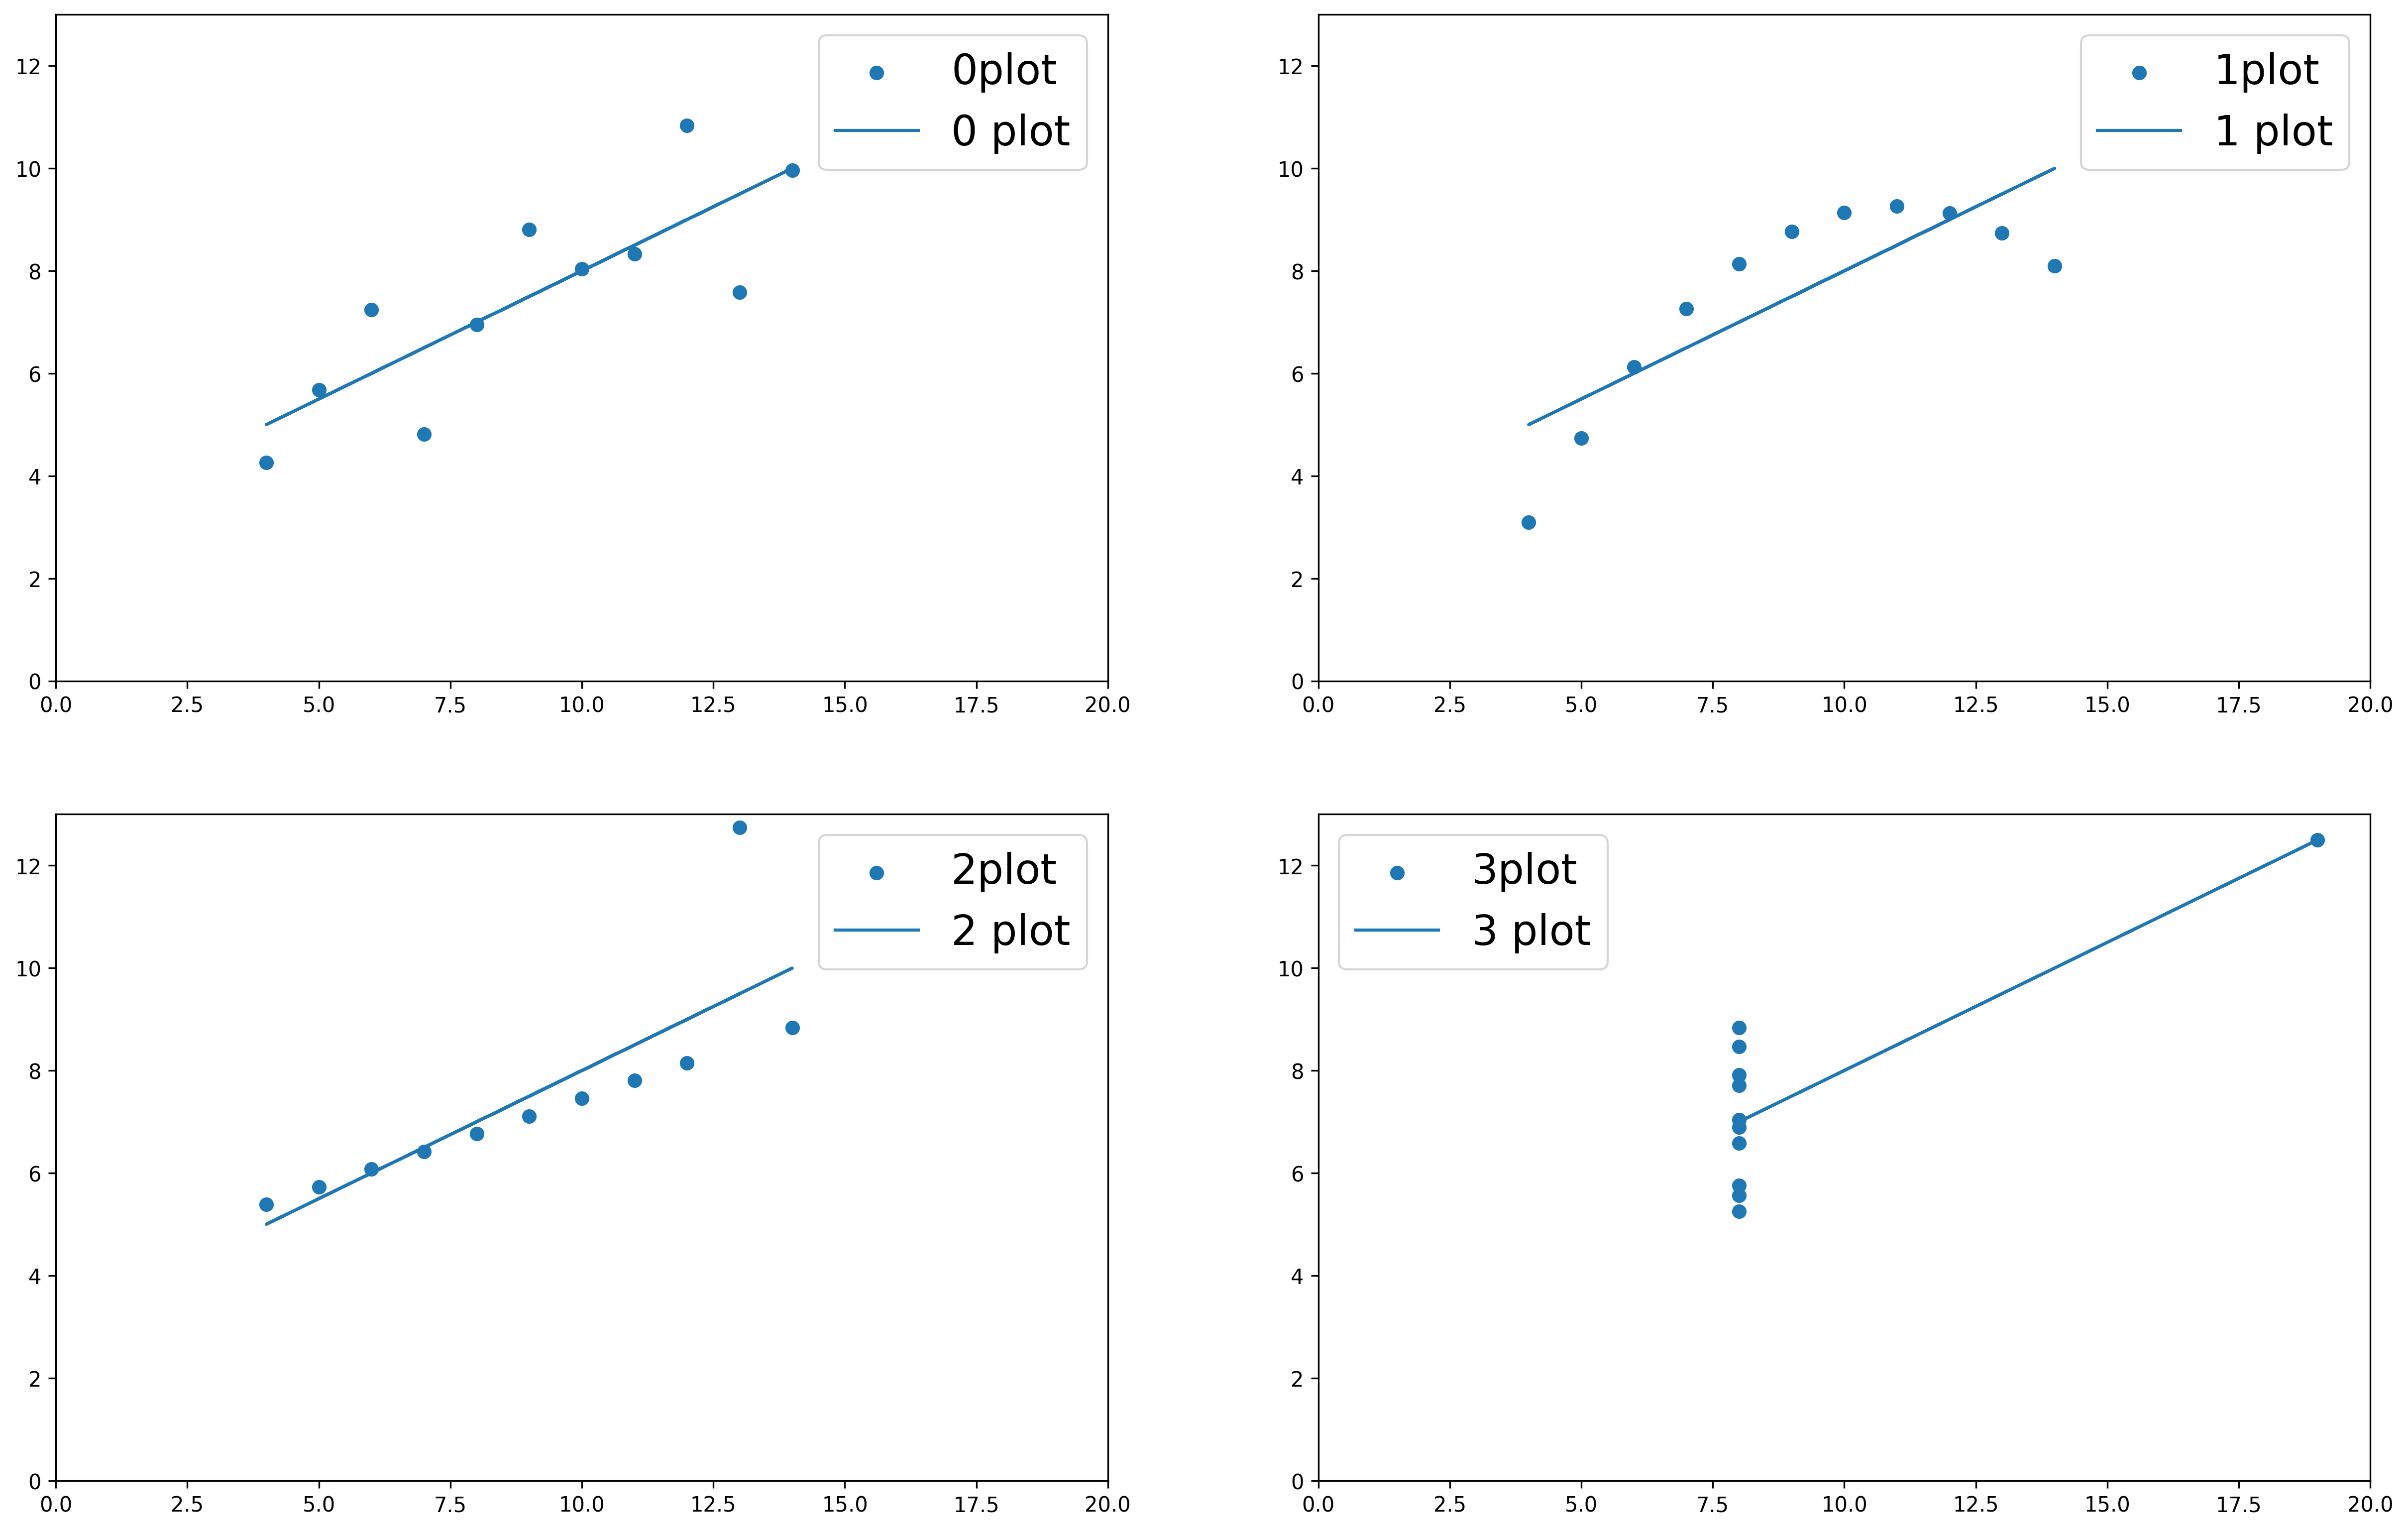

In [4]:
#Get the data
A = np.load("anscombe.npy")

fig_tree, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2,2, figsize = (20,13))
#loop through each section
plot_list = [ax_1, ax_2, ax_3, ax_4]
for i in range(4):
    #choose the odd and even columns
    x = A[:,2*i]
    y = A[:,2*i + 1]
    #get the values for slope, intercept, coefficient
    slope, intercept, coefficient = stats.linregress(x,y)[:3]
    #plot 
    plot_list[i].scatter(x,y, label=str(i) + "plot")
    plot_list[i].plot(x, slope * x + intercept, label=str(i) + " plot")
    plot_list[i].axis((0,20,0,13))
    #Mean values 
    mean_x = np.sum(x)/len(x)
    mean_y = np.sum(y)/len(y)
    #variance values
    var_x = np.var(x)
    var_y = np.var(y)
    
    print("The order: mean in x,y, variance in x,y, slope, intercept, coefficient")
    print("\nStatistics for the", i ,"th column:")
    print(mean_x, mean_y, var_x, var_y, slope, intercept, coefficient)
    
    plot_list[i].legend(prop={'size':20})

plt.show()

*************Description: Although the datas varies, the statistic values are significantly close.***************

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

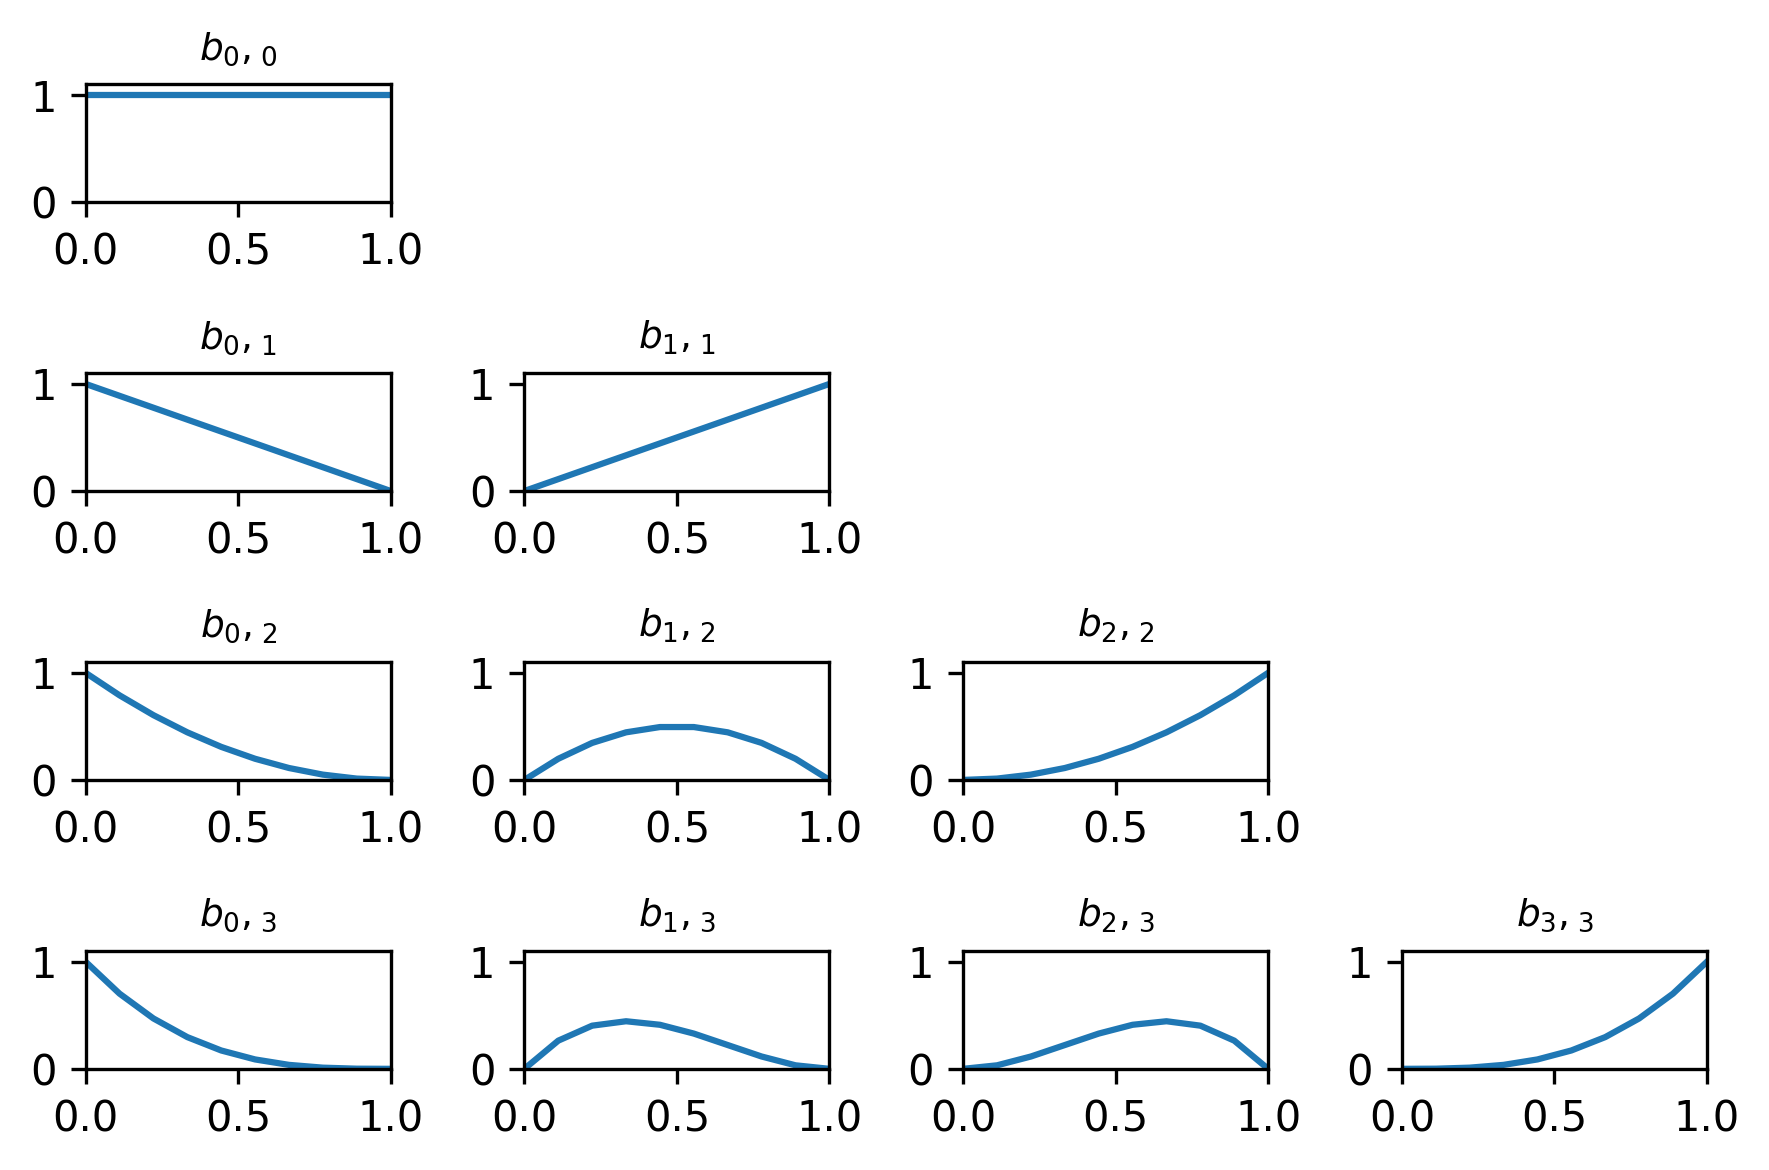

In [5]:
#any x in domain
x = np.linspace(0,1,10)
#list of index
for i in [1,5,6,9,10,11,13,14,15,16]:
    n = i//4
    v = i%4 -1
    #plot
    plt.subplot(4,4,i)
    
    if i == 1:
        n = 0
        v = 0
    elif i == 16:
        n = 3
        v = 3
    #use the function    
    plt.plot(x, comb(n,v)*(x**v)*(1-x)**(n-v))
    #choose the axis
    plt.axis([0,1,0,1.1])
    #title the boxes
    plt.title(r"$b_{},_{}$".format(v,n),size = 9)
    

plt.tight_layout()
plt.show()


### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

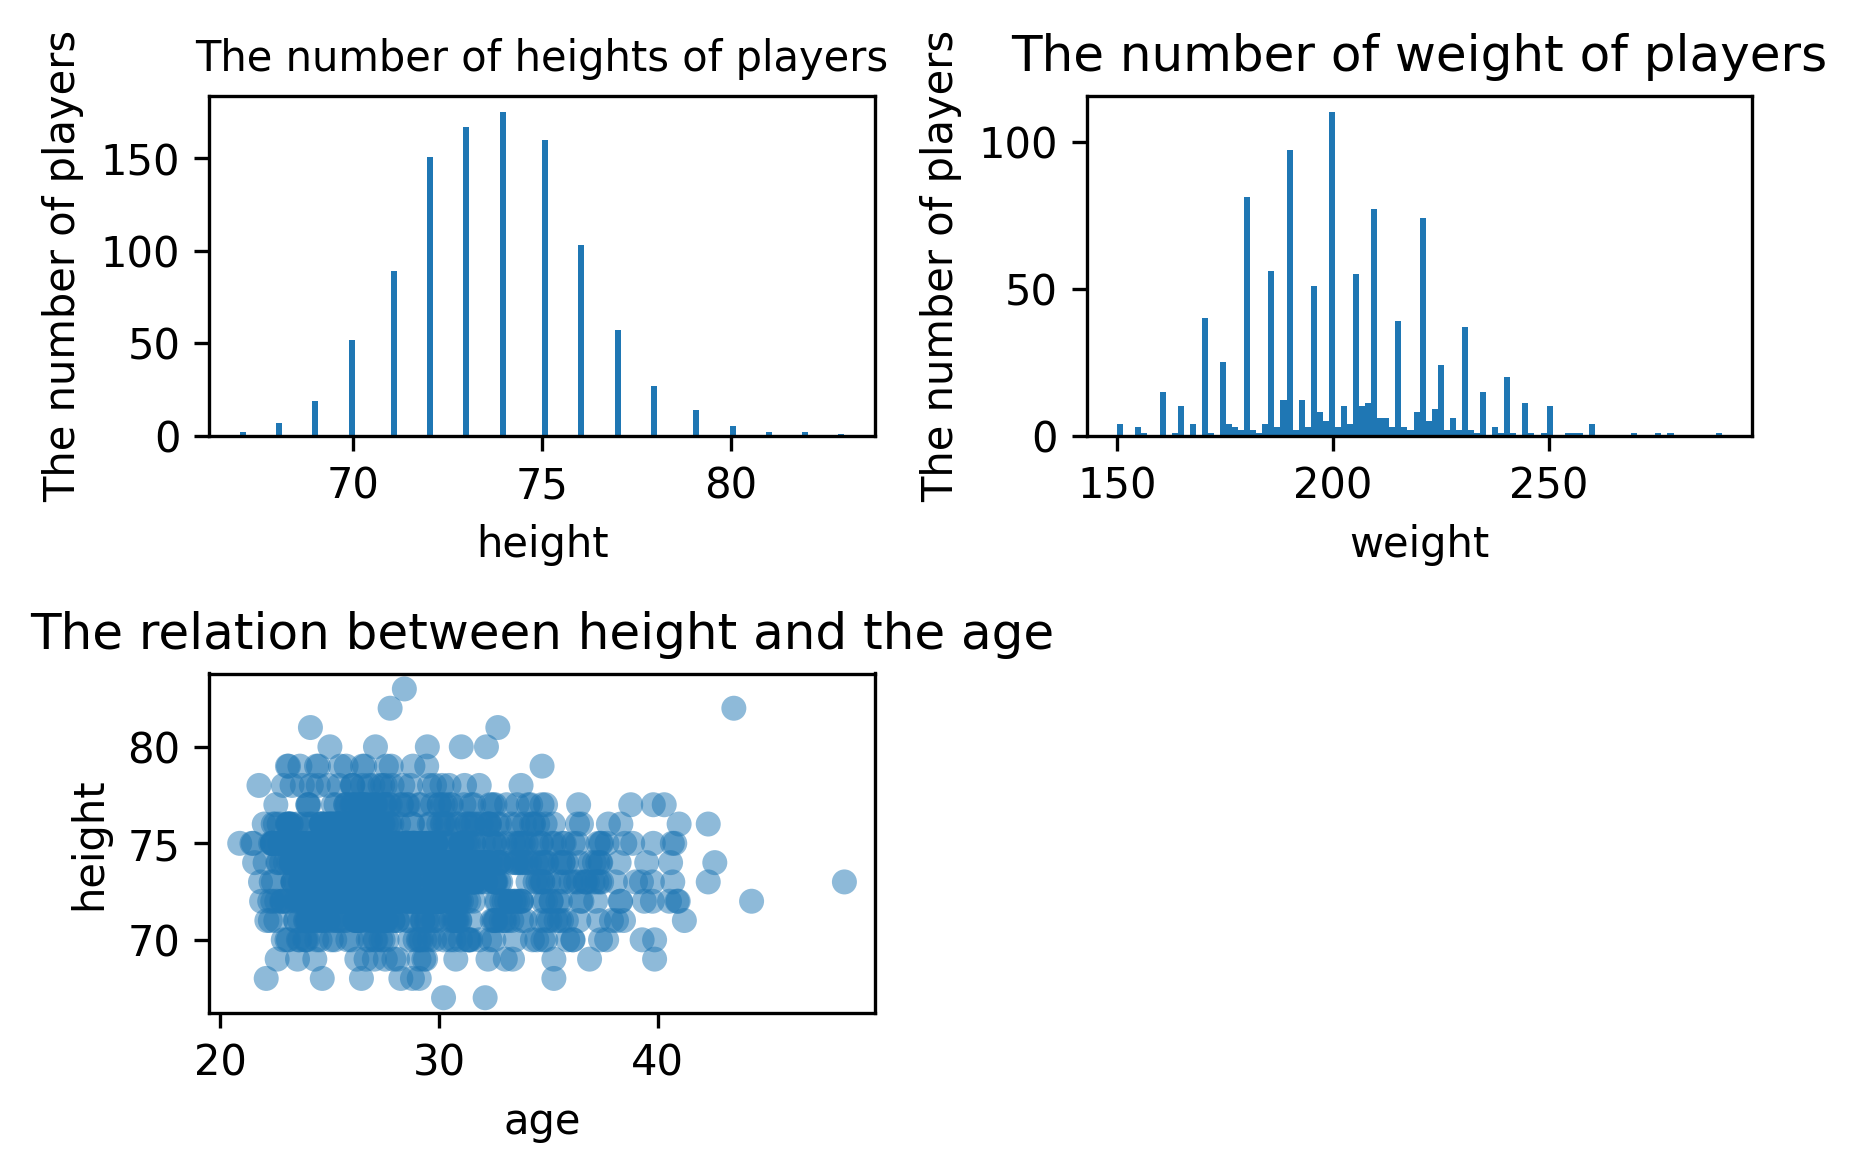

In [6]:
height, weight, age = np.load("MLB.npy").T
fig, ax = plt.subplots(2,2)

#The number of height of players
data = height
ax[0,0].hist(data, bins=100)
ax[0,0].set_title("The number of heights of players",size = 10)
ax[0,0].set_xlabel("height")
ax[0,0].set_ylabel("The number of players")

#The number of weight of players
data = weight
ax[0,1].hist(data, bins=100)
ax[0,1].set_title("The number of weight of players")
ax[0,1].set_xlabel("weight")
ax[0,1].set_ylabel("The number of players")

#The age chart
ax[1,0].scatter(age, height, alpha=.5, edgecolor='none')
ax[1,0].set_title("The relation between height and the age",)
ax[1,0].set_xlabel("age")
ax[1,0].set_ylabel("height")

ax[1,1].axis("off")
plt.tight_layout()
plt.show()

*****It seems like the average of height is around 74,average weight is around 200.
     Then,it is more tendency in height in younger age than in the older age.*********

### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

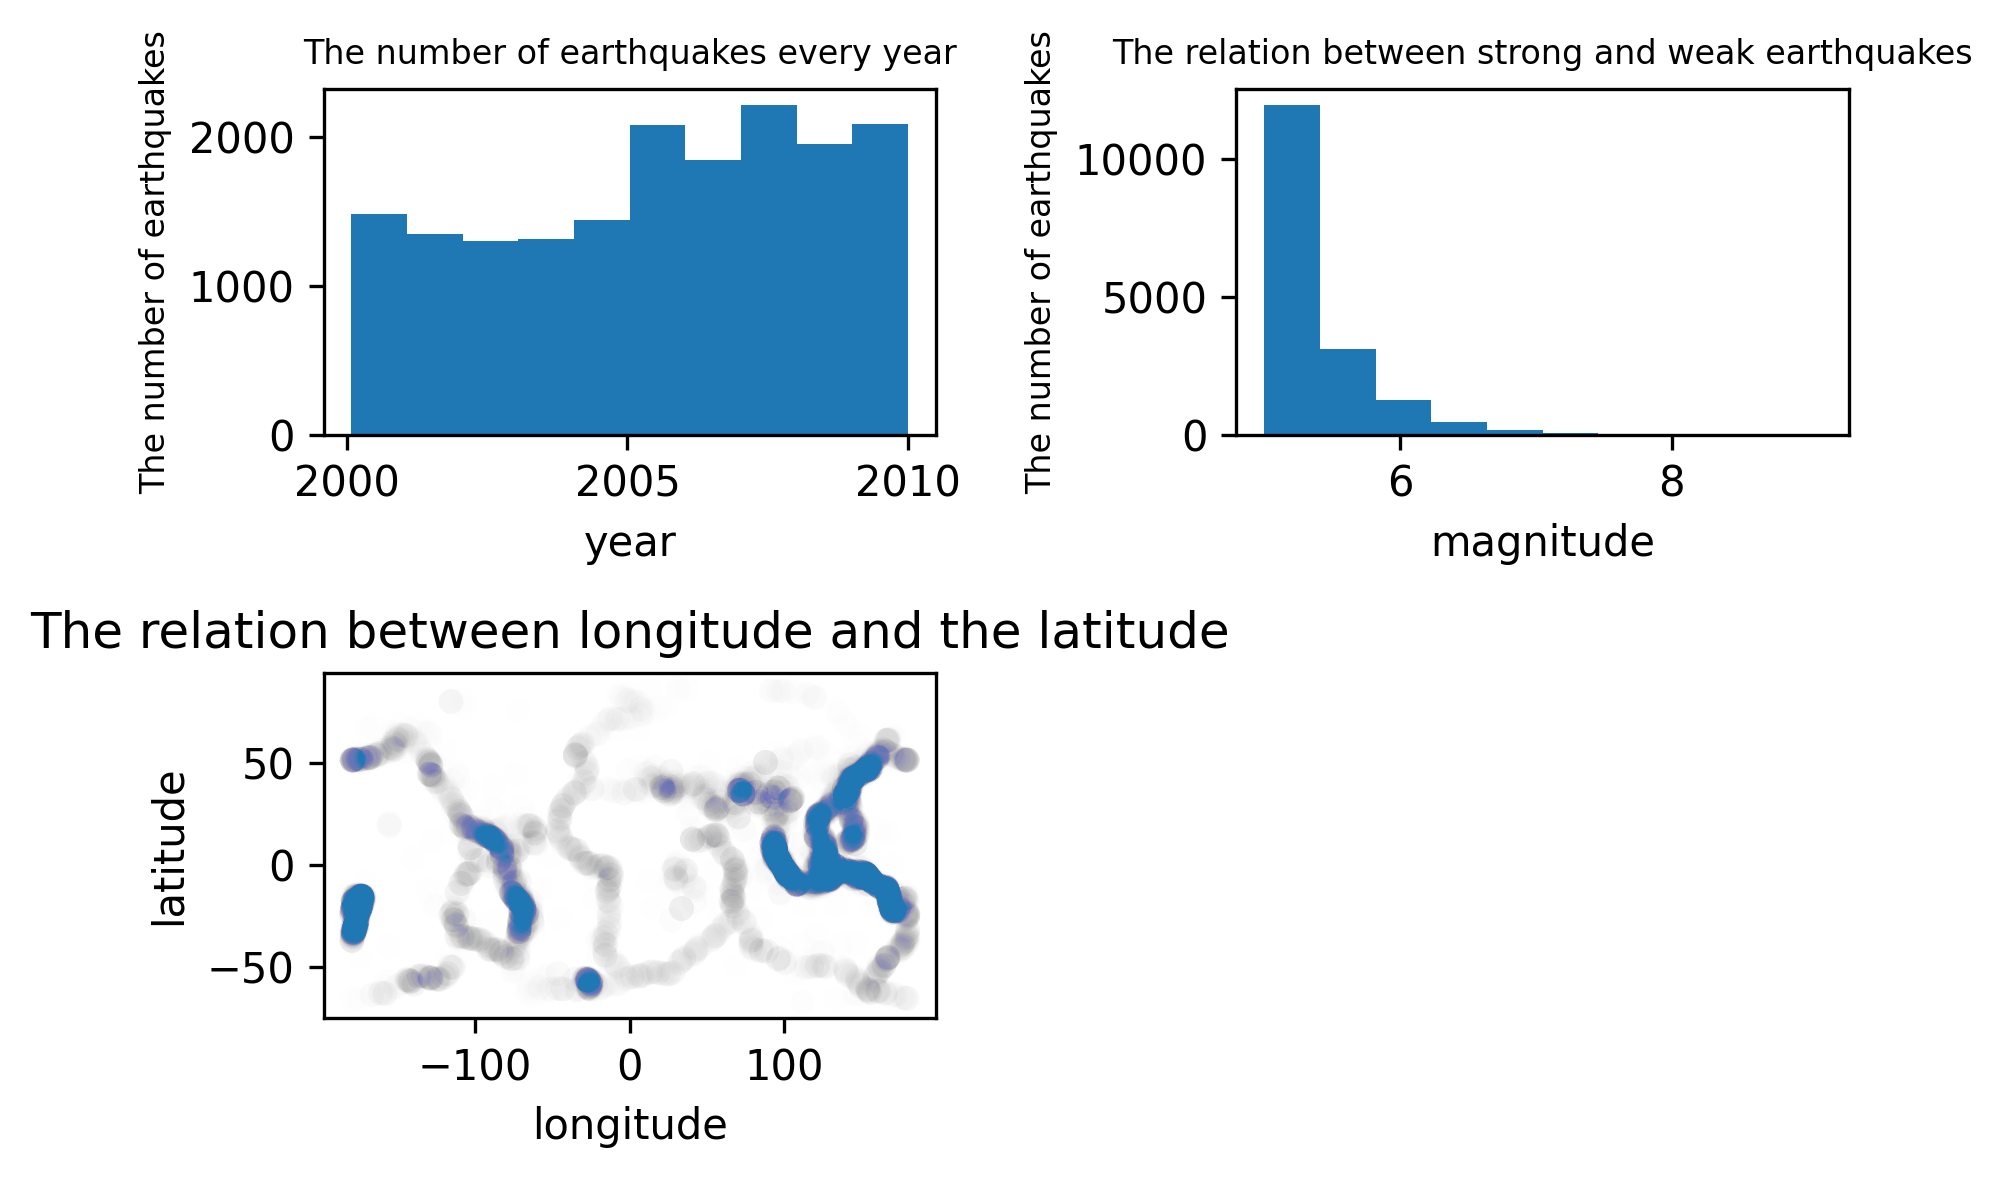

In [7]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T
fig, ax = plt.subplots(2,2)

#The number of earthquakes depending on years
data = years
ax[0,0].hist(data, bins=10)
ax[0,0].set_title("The number of earthquakes every year",size = 8)
ax[0,0].set_xlabel("year")
ax[0,0].set_ylabel("The number of earthquakes",size = 8)

#The relation between strong and weak earthquakes
data = magnitudes
ax[0,1].hist(data, bins=10)
ax[0,1].set_title("The relation between strong and weak earthquakes",size = 8)
ax[0,1].set_xlabel("magnitude")
ax[0,1].set_ylabel("The number of earthquakes",size = 8)

#The relation between longitude and the li
ax[1,0].scatter(longitude, latitude, alpha=.005, edgecolor='none')
ax[1,0].set_title("The relation between longitude and the latitude")
ax[1,0].set_xlabel("longitude")
ax[1,0].set_ylabel("latitude")
plt.axis("equal")

ax[1,1].axis("off")
plt.tight_layout()
plt.show()

*****It seems like there are more earthquakes when the goes one,
     There are more weak earthquakes than the bigger one.
     When latitude is close to 0, there are more chance to get it.

### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

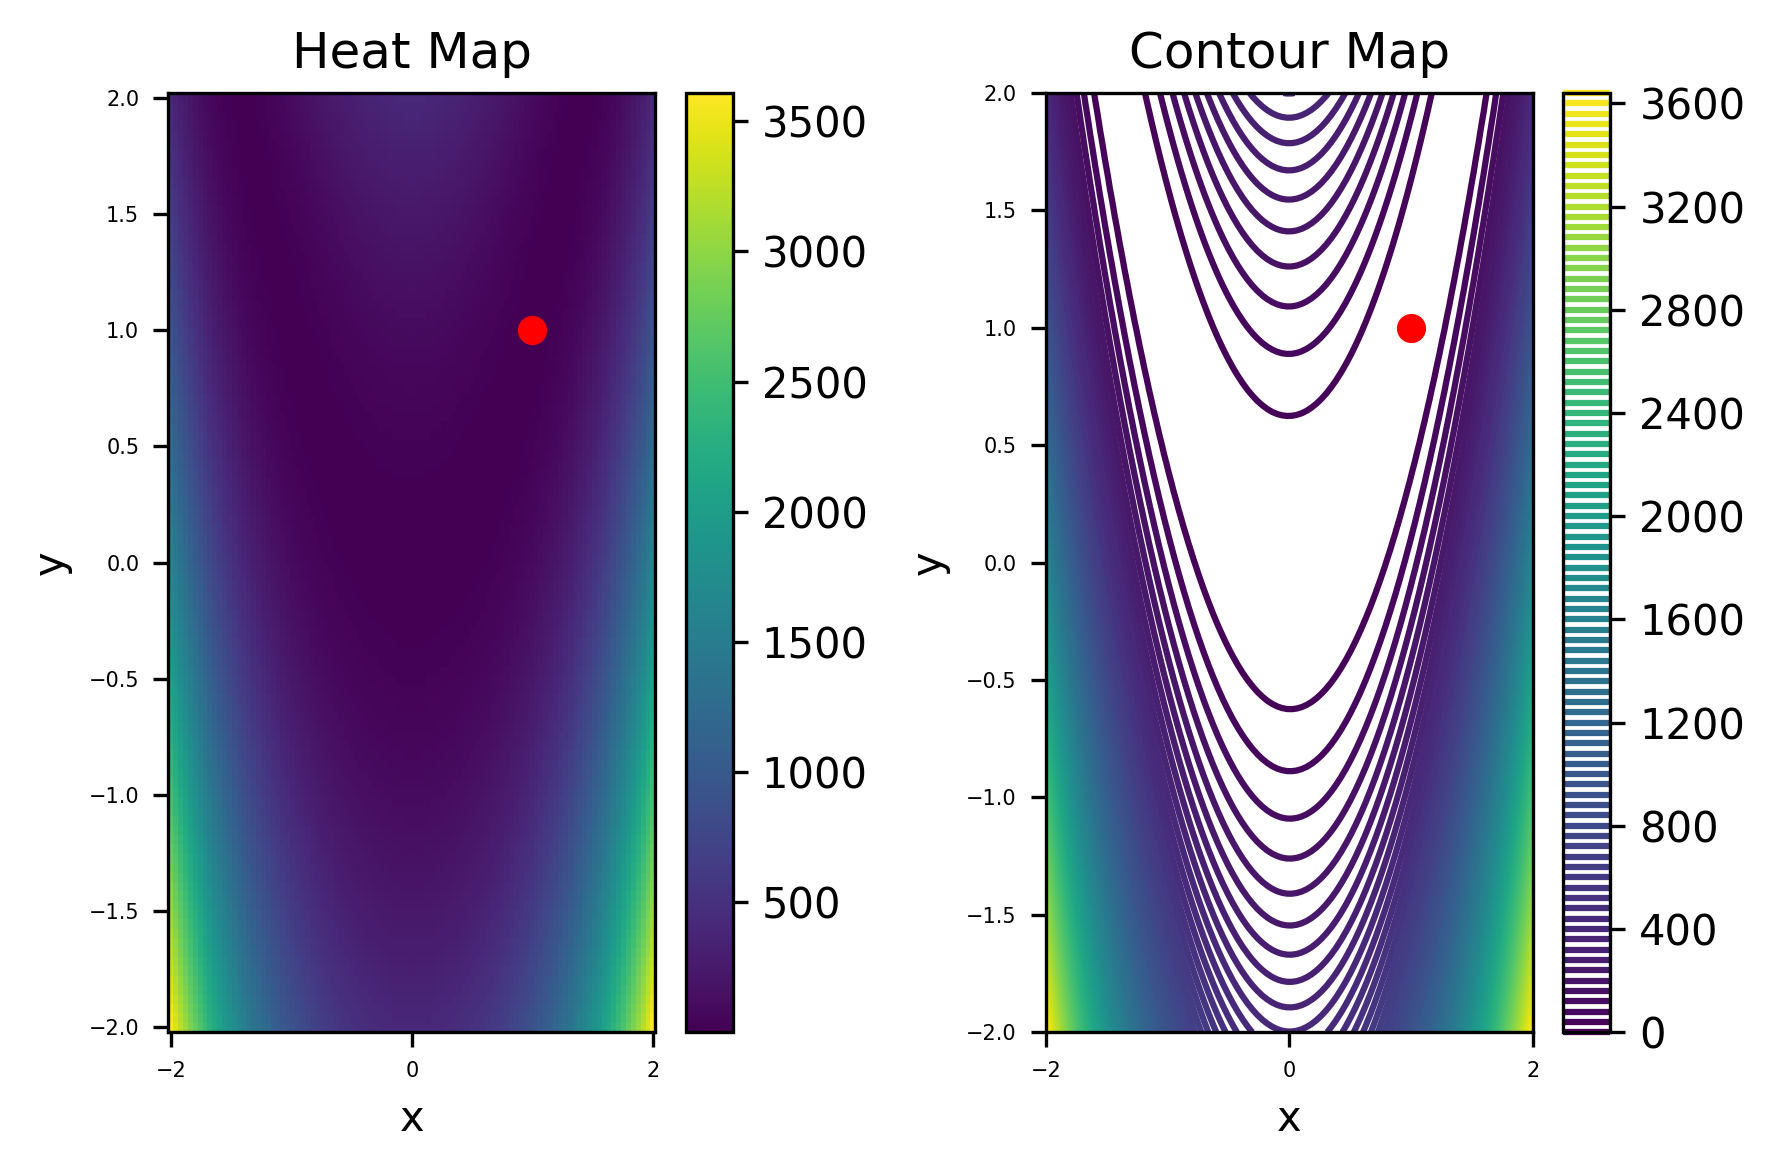

In [11]:
x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
Z = (1-X)**2 +100*(Y-X**2)**2

#Heat Map
ax_1 = plt.subplot(121)
plt.colorbar(ax_1.pcolormesh(X, Y, Z, cmap="viridis"))
plt.plot(1,1, 'ro')
plt.xticks(fontsize='5')
plt.yticks(fontsize='5')
plt.title("Heat Map")
ax_1.set_xlabel("x", fontsize = 10)
ax_1.set_ylabel("y", fontsize = 10)

#Countour Map
ax_2 = plt.subplot(122)
plt.colorbar(ax_2.contour(X, Y, Z, 100, cmap="viridis"))
plt.plot(1,1, 'ro')
plt.xticks(fontsize='5')
plt.yticks(fontsize='5')
ax_2.set_xlabel("x", fontsize = 10)
ax_2.set_ylabel("y", fontsize = 10)
plt.title("Contour Map")

plt.tight_layout()
plt.show()

*******It's easier to grsp the situation when you look at the heat map since it's continuous.**********

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

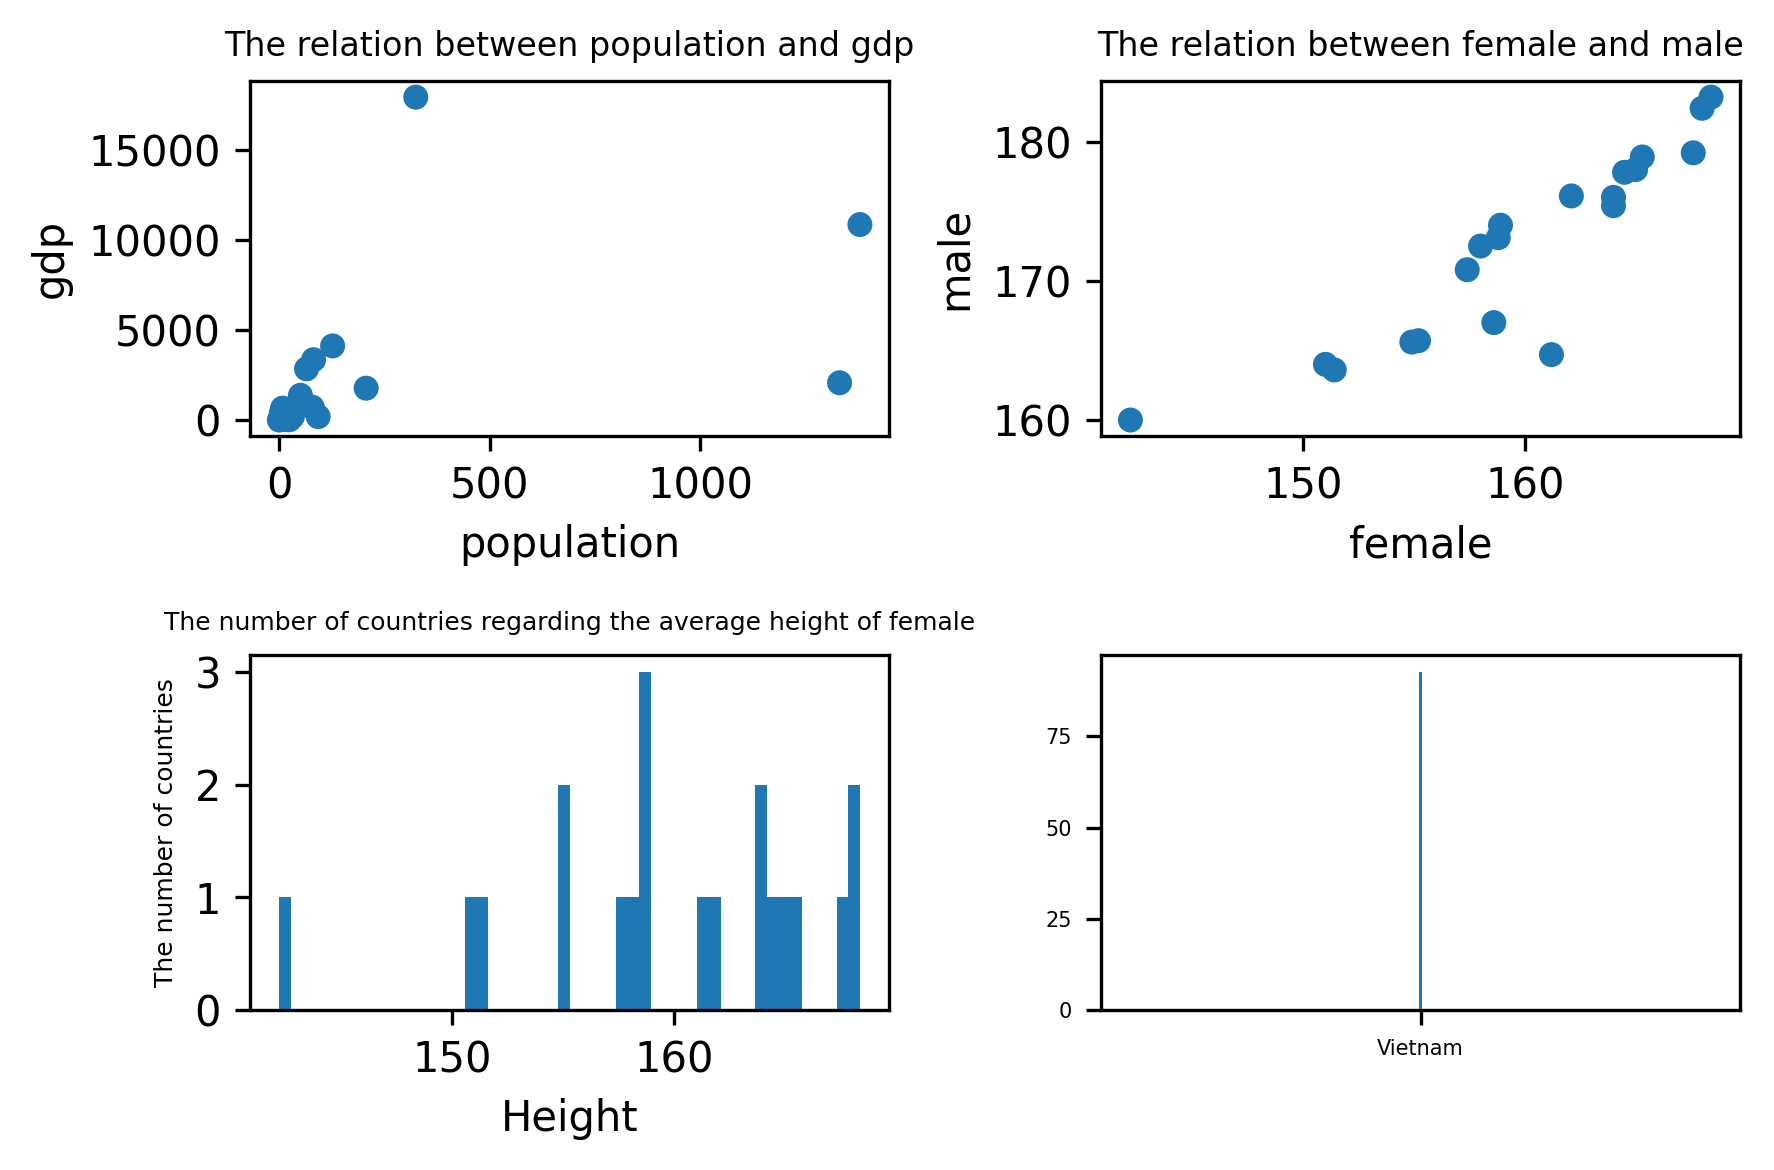

In [9]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

fig, ax = plt.subplots(2,2)

#The relation between population and gdp
ax[0,0].scatter(population, gdp, alpha=1, edgecolor='none')
ax[0,0].set_title("The relation between population and gdp",size = 8)
ax[0,0].set_xlabel("population")
ax[0,0].set_ylabel("gdp")
plt.axis("equal")

#The relation between female and male
ax[0,1].scatter(female, male, alpha=1, edgecolor='none')
ax[0,1].set_title("The relation between female and male",size = 8)
ax[0,1].set_xlabel("female")
ax[0,1].set_ylabel("male")
plt.axis("equal")

#The number of countries regarding the average height of female
data = female
ax[1,0].hist(data, bins=50)
ax[1,0].set_title("The number of countries regarding the average height of female",size = 6)
ax[1,0].set_xlabel("Height")
ax[1,0].set_ylabel("The number of countries",size = 6)

#The population for each country
ax[1,1].bar(countries[::-30],population[::-30])
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.tight_layout()
plt.show()

*****It seems like there are not that much relation between the population and gdp
     On the other hand, its semes pretty related when it comes to gender comparison.
     It seems like there is a normal distribution regarding heights.*************